* https://drive.google.com/file/d/1todwi6NRInDwkFY24sSneP0c7RGTNTms/view?usp=sharing

In [79]:
#그래프 스타일
plt.style.use('ggplot')

import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

#### konlpy 정상동작 확인

In [58]:
from konlpy.tag import Okt

okt = Okt()
print(okt.morphs("KoNLPy가 정상 설치되었는지 확인 중입니다."))


['KoNLPy', '가', '정상', '설치', '되었는지', '확인', '중', '입니다', '.']


In [59]:
import jpype
if not jpype.isJVMStarted():
    jpype.startJVM()
print("JPype와 JVM이 정상 작동 중입니다.")


JPype와 JVM이 정상 작동 중입니다.


In [60]:
import pandas as pd

#### 데이터 준비

In [61]:
# ------------------------------
#   파일 경로
# ------------------------------
data_file = 'data\\네이버증권뉴스\\주요뉴스_세부내용포함_2025-04-23_1745395646.csv'

# ------------------------------
#   불러올 컬럼명
# ------------------------------
col_name = 'title'

# ------------------------------
#   데이터 불러오기
# ------------------------------
data = pd.read_csv(data_file).loc[:,col_name].dropna()

# ------------------------------
#   내용 컬럼을 하나의 문장으로 합치기
# ------------------------------
text = ' '.join(data)
text

'날개 단 바이오株…FDA승인 기대감에 상한가, 불발 시엔 \'와르르\' 증시회복에 ··· 소리없이 오른 증권주 한발 물러선 트럼프에 코스피 ‘성큼’…단숨에 2520대 복귀 [투자360] 국고채 10년물 금리, 3년 2개월래 최저치…미 4월 S&P PMI 대기(종합) 관세 전쟁에도 급증하는  `빚투`…삼전·SK하닉 증거금률 대폭 올랐다  "머스크 정신 차리나"…테슬라 실적부진에도 이차전지株 \'껑충\'[살까팔까] 최악 실적에도 테슬라 주가는 바닥 탈출···2분기 연속 어닝쇼크 무시 2500선 재차 넘은 코스피...\'실적·정책\'에 순환매 장세 탄력 올 들어 18조 내다판 외국인...이 종목은 지분율 확 높였다 관세에 떨던 반도체株, 美中 갈등 완화 기대에 ‘활짝’…SK하이닉스 4%↑[투자360] 캐시 우드의 아크인베스트, 솔라나 첫 매수 "단타로 돈 벌자" 불개미 달려들었다…회전율 200% 넘긴 정치 테마주 커지는 글로벌 원자력 시장···오르는 국내 원전주 안철수 후보 2차 경선行에…관련주 또 \'들썩\' [이런국장 저런주식] 테슬라 시간외 급등에…국내 이차전지株 \'들썩\'(종합) 반도체·이차전지 모두 강세…코스피 2500 탈환 ‘한화에어로 99%·이마트 45%’ 연초比 영업익 전망 상향株 주목…“관세 공포 정점 코스피, 실적 민감도↑”[투자360] “글로벌 기업들이 공장 짓는 곳”… 관세 전쟁에도 오르는 인도 증시 \'유증 부정거래 의혹\' 고려아연, 검찰 압수수색에 주가 \'출렁\'(종합) 안철수, 국민의힘 2차 경선 진출…써니전자·안랩 주가 강세(종합) 이재명 테마주 DSC인베, 주가 오르자 임원들 수십억 매도 SCHD, 美서 평가 하향조정되고 자금 빠지고…서학개미 사랑은 꾸준 민주당 ‘퇴직연금 기금화’ 추진에 PE업계 ‘반색’ “‘투자경고·위험’ 종목 80% 정치테마주…주가 변동률 ‘코스피 7배 122%” [투자360] 日 시총 1천억원 미만 상폐 추진…"자본시장 전환점" PBR 0.1 기업 정리한다는데…청산 가치보다 낮은 기업 어디? "금값은 너무

#### 문자열 정제
* 한글만 남기기

In [62]:
import re
clean_text = re.sub(r'[^가-힇\s]', ' ', text)
clean_text

'날개 단 바이오     승인 기대감에 상한가  불발 시엔  와르르  증시회복에     소리없이 오른 증권주 한발 물러선 트럼프에 코스피  성큼  단숨에     대 복귀  투자     국고채   년물 금리   년  개월래 최저치 미  월         대기 종합  관세 전쟁에도 급증하는   빚투  삼전   하닉 증거금률 대폭 올랐다   머스크 정신 차리나  테슬라 실적부진에도 이차전지   껑충  살까팔까  최악 실적에도 테슬라 주가는 바닥 탈출    분기 연속 어닝쇼크 무시     선 재차 넘은 코스피    실적 정책 에 순환매 장세 탄력 올 들어   조 내다판 외국인   이 종목은 지분율 확 높였다 관세에 떨던 반도체      갈등 완화 기대에  활짝    하이닉스     투자     캐시 우드의 아크인베스트  솔라나 첫 매수  단타로 돈 벌자  불개미 달려들었다 회전율      넘긴 정치 테마주 커지는 글로벌 원자력 시장   오르는 국내 원전주 안철수 후보  차 경선 에 관련주 또  들썩   이런국장 저런주식  테슬라 시간외 급등에 국내 이차전지   들썩  종합  반도체 이차전지 모두 강세 코스피      탈환  한화에어로     이마트      연초  영업익 전망 상향  주목  관세 공포 정점 코스피  실적 민감도   투자      글로벌 기업들이 공장 짓는 곳   관세 전쟁에도 오르는 인도 증시  유증 부정거래 의혹  고려아연  검찰 압수수색에 주가  출렁  종합  안철수  국민의   차 경선 진출 써니전자 안랩 주가 강세 종합  이재명 테마주    인베  주가 오르자 임원들 수십억 매도        서 평가 하향조정되고 자금 빠지고 서학개미 사랑은 꾸준 민주당  퇴직연금 기금화  추진에   업계  반색    투자경고 위험  종목     정치테마주 주가 변동률  코스피  배        투자       시총  천억원 미만 상폐 추진  자본시장 전환점          기업 정리한다는데 청산 가치보다 낮은 기업 어디   금값은 너무 올랐어  대안은  이것 

* 블용어 사전

In [63]:
# -----------------------
# 외부 불용어 사전
# -----------------------

import requests

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ko/refs/heads/master/stopwords-ko.txt"
response = requests.get(url)

# 줄 단위로 나누고, 공백 제거 후 리스트 생성
external_stopwords = [line.strip() for line in response.text.splitlines() if line.strip()]

# -----------------------
# 커스터마이즈 불용어 사전
# -----------------------
custom_stopwords = []


# -----------------------
# 최종 불용어 사전
#   외부 불용어 사전, 커스터마이즈 불용어사전 합치고 중복 제거
# -----------------------
stopwords = set(external_stopwords + custom_stopwords)

#### 명사 추출 및 불용어 제거
* KoNLPy라이브러리의 형태소분석기 사용
* KoNLPy 사용 시 자바(JDK)가 필요할 수 있으니, 환경에 따라 JDK 설치 및 JAVA_HOME 환경변수 설정이 필요할 수도 있습니다​

In [64]:
# ----------------------------
# 형태소 분석기로 명사만 추출
# ----------------------------

from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(clean_text)

# ----------------------------
# 한글자인 명사와 불용어 제거
# ----------------------------

filtered_nouns = [
    n for n in nouns
    if len(n) > 1 and n not in stopwords
]

#### 단어 빈도 계산
* 리스트에서 각 항목이 몇 번 나오는지 카운트

In [65]:
from collections import Counter

counter = Counter(filtered_nouns)  # 명사 리스트를 Counter 객체로 변환
print(counter.most_common(10))

[('투자', 19), ('관세', 19), ('주가', 14), ('테슬라', 13), ('트럼프', 12), ('기대', 12), ('상승', 11), ('증권', 10), ('코스피', 10), ('전쟁', 10)]


#### 상위명사 추출

In [66]:
top100 = dict(counter.most_common(100))  # 가장 많이 등장한 50개 단어만 추출하여 딕셔너리 생성

#### 한글 폰트 설정 및 워드클라우드 시각화

C:\Users\User\AppData\Local\Temp\ipykernel_18228\4026250054.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('GnBu')


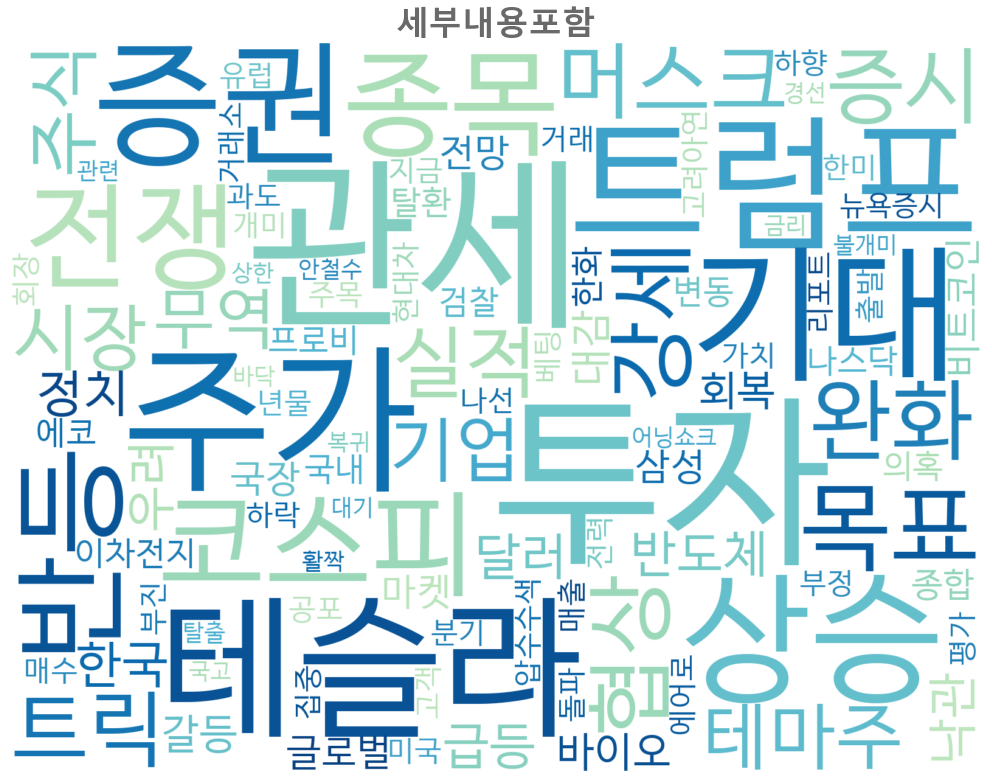

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'  # 한글 폰트 경로

cmap = cm.get_cmap('GnBu')

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    value = random.uniform(0.3, 1.0)
    r, g, b, _ = cmap(value)
    return f"rgb({int(r*255)}, {int(g*255)}, {int(b*255)})"

# 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=600,
    color_func=color_func,
    max_font_size=150,
    scale=2
)
cloud = wc.generate_from_frequencies(top100)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

# 타이틀 삽입 (폰트 키우고, bold 유지)
plt.title("세부내용포함", 
          fontsize=24, color='dimgray', weight='bold', loc='center')

# 위쪽 여백 조정 (타이틀 더 위로)
plt.subplots_adjust(top=0.88)  # 0.95보다 낮추면 더 위로 올라감

plt.tight_layout(pad=1)
plt.show()

In [68]:
from matplotlib import font_manager

# 시스템에 설치된 모든 폰트 리스트 가져오기
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# 한글 폰트만 필터링 (이름에 'Malgun', 'Gothic', 'Nanum', 'Apple' 등 포함)
korean_fonts = [f for f in font_list if 'malgun' in f.lower() or
                'gothic' in f.lower() or
                'nanum' in f.lower() or
                'apple' in f.lower()]

# 결과 확인
for font in korean_fonts:
    print(font)


C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumPen.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunpenR.ttf
C:\Windows\Fonts\NanumMyeongjo.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\Gong Gothic Bold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquare_acR.ttf
C:\Windows\Fonts\GOTHIC.TTF
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumMyeongjoExtraBold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothicBold.ttf
C:\Windows\Fonts\Hancom Gothic Bold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumBarunGothic.ttf
C:\Windows\Fonts\msgothic.ttc
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\Gong Gothic Light.ttf
C:\Windows\Fonts\NanumMyeongjoBold.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundR.ttf
C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NanumSquareRoundL.ttf
C:\Users\User\AppData\